In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap

In [15]:
# import data file
df = pd.read_excel('hotdog-contest-winners.xlsm')
df.head()

,Year,Winner,Dogs eaten,Country,New record
0,1980,Paul Siederman & Joe Baldini,9.1,United States,0
1,1981,Thomas DeBerry,11.0,United States,0
2,1982,Steven Abrams,11.0,United States,0
3,1983,Luis Llamas,19.5,Mexico,0
4,1984,Birgit Felden,9.5,Germany,0


In [16]:
# Create two new columns, decade and hot dogs eaten range based on the values in year and dogs eaten columns

# decade column
conditions = [(df['Year'] < 1990),
    (df['Year'] >= 1990) & (df['Year'] < 2000),
    (df['Year'] >= 2000) & (df['Year'] < 2010)]
choices = ["80's", "90's", "00's"]
df['decade'] = np.select(conditions, choices, default = "10's")

# range column
conditions = [(df['Dogs eaten'] < 20),
    (df['Dogs eaten'] >= 20) & (df['Dogs eaten'] < 50)]
choices = ["Low", "Average"]
df['Hot Dogs Eaten Range'] = np.select(conditions, choices, default = "High")
df.head()

,Year,Winner,Dogs eaten,Country,New record,decade,Hot Dogs Eaten Range
0,1980,Paul Siederman & Joe Baldini,9.1,United States,0,80's,Low
1,1981,Thomas DeBerry,11.0,United States,0,80's,Low
2,1982,Steven Abrams,11.0,United States,0,80's,Low
3,1983,Luis Llamas,19.5,Mexico,0,80's,Low
4,1984,Birgit Felden,9.5,Germany,0,80's,Low


In [18]:
# create a dataframe for the bar chart that groups wins by country 
bar_df = df.groupby('Country')['Winner'].count()
bar_df = bar_df.reset_index()
bar_df = bar_df.sort_values(by=['Winner'], ascending = False)
bar_df

,Country,Winner
3,United States,20
1,Japan,9
0,Germany,1
2,Mexico,1


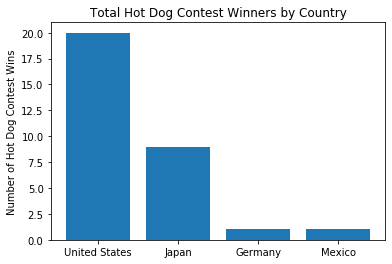

In [19]:
# create the bar chart of total hot dog winner by country
plt.bar(bar_df["Country"],bar_df["Winner"])
plt.ylabel('Number of Hot Dog Contest Wins')
plt.title('Total Hot Dog Contest Winners by Country')
plt.savefig('bar.png')
plt.show()

In [22]:
# create the stacked bar chart dataframe that groups the data by decade then country and totals all the dogs eaten
s_bar_df = pd.DataFrame(df.groupby(['decade','Country'])['Dogs eaten'].sum())
s_bar_df  = s_bar_df.reset_index()
s_bar_df

,decade,Country,Dogs eaten
0,00's,Japan,326.38
1,00's,United States,193.00
2,10's,United States,54.00
3,80's,Germany,9.50
4,80's,Mexico,19.50
5,80's,United States,97.35
6,90's,Japan,43.50
7,90's,United States,155.50


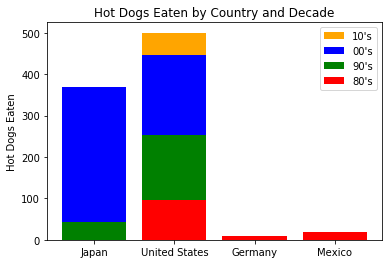

In [23]:
# create the decades and counries lists to be used in the stacked bar chart
decades = s_bar_df['decade'].unique().tolist()
countries = s_bar_df['Country'].unique().tolist()
# create the arrays for hot dogs eaten for each decade by country. data is extracted from s_bar_df
decade_00s = np.array([326, 193, 0, 0])
decade_10s = np.array([0, 54, 0, 0])
decade_80s = np.array([0, 97, 10, 20])
decade_90s = np.array([44, 156, 0, 0])
ind = [x for x, _ in enumerate(decades)]
# create the stacked bar chart
plt.bar(ind, decade_10s, width=0.8, label="10's", color='orange', bottom=decade_00s+decade_90s+decade_80s)
plt.bar(ind, decade_00s, width=0.8, label="00's", color='blue', bottom=decade_90s+decade_80s)
plt.bar(ind, decade_90s, width=0.8, label="90's", color='green', bottom=decade_80s)
plt.bar(ind, decade_80s, width=0.8, label="80's", color='red')

plt.xticks(ind, countries)
plt.ylabel("Hot Dogs Eaten")
plt.legend(loc="upper right")
plt.title("Hot Dogs Eaten by Country and Decade")
plt.savefig('stacked.png')
plt.show()

In [24]:
# create the pie chart dataframe that groups the data by the amount of wins by each hot dog eaten range
pie_df = pd.DataFrame(df.groupby('Hot Dogs Eaten Range')['Winner'].count())
pie_df = pie_df.reset_index()
pie_df

,Hot Dogs Eaten Range,Winner
0,Average,8
1,High,8
2,Low,15


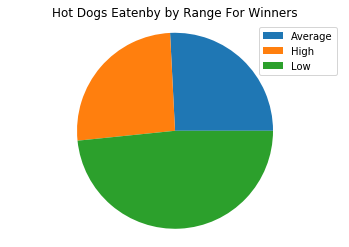

In [28]:
# Create pie chart
labels = pie_df['Hot Dogs Eaten Range'].unique()
sizes = pie_df['Winner']
fig1, ax1 = plt.subplots()
ax1.pie(sizes)
ax1.legend(labels,loc="best")
ax1.axis('equal')
plt.title('Hot Dogs Eatenby by Range For Winners')
plt.savefig('pie.png')
plt.show()

In [29]:
# Create the dataframe for the donut chart that groups the average number of hot dogs eaten by winner by country
dnut_df = pd.DataFrame(df.groupby('Country')['Dogs eaten'].mean()).reset_index()
dnut_df

,Country,Dogs eaten
0,Germany,9.500000
1,Japan,41.097778
2,Mexico,19.500000
3,United States,24.992500


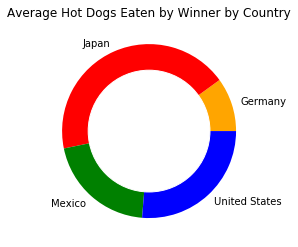

In [30]:
# create the country names and sizes for the donut chart
names = dnut_df['Country'].to_list()
size = dnut_df['Dogs eaten'].to_list()
# create the center of the donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
# create the donut chart
plt.pie(size, labels=names, colors=['orange','red','green','blue'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Average Hot Dogs Eaten by Winner by Country')
plt.savefig('donut.png')
plt.show()